![New York Times](./images/New_York_Times.png)

# New York Times - Archive Research 2020

In the following Jupyter Notebook, an analysis of the article archive of the internationally highly regarded New York Times is to be carried out as part of the **Big Data Lab I** module of the Master's programme "Applied Information and Data Science".

## Goal and Objectives

The aim of this analysis is to apply and deepening the understanding of the material studied in class. For this purpose, the article archive of the New York Times from the year 2020 is analysed. A special focus is placed on articles with the theme of health. This is because the corona pandemic has broken out in 2020 and is therefore expected to have a strong influence in this category.

In order to take a closer look at the topic described above, the following questions should be answered by means of targeted queries in the *MongoDB*:

* Did the pandemic have an impact on the number of articles written in the New York Times?
* Who are the New York Times' top writers? and which section do they write?
* To what extent did the COVID-19 pandemic dominate the news coverage?
* How have the articles in the 'Health' section changed as a result of the COVID-19 pandemic?

## Procedure and Structure

To analyse the New York Times article archive, the data must first be downloaded via the newspaper's official API. Afterwards, this data is saved in a *MongoDB* and processed using the Python package *Pymongo*. The entire project is carried out within a *Jupyter Notebook* and converted into a PDF after the completion. 

## Requirements & Configurations

The first step is to load the required packages into the *Jupyter Notebook* and check the versions of the packages, make the *Pandas* configurations, deposit the database credenials and connect to the database. This is done in the following code cells:

In [4]:
import pymongo
from pprint import pprint
import pandas as pd
import requests
import json
from bson.objectid import ObjectId
import time
import matplotlib.pyplot as plt


In [5]:
! pip3 list | findstr "pymongo dnspython pandas"

dnspython                         2.1.0
pandas                            1.3.4
pymongo                           3.12.1


You should consider upgrading via the 'C:\Users\saend\Desktop\bigdatalab1\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [6]:
# pandas configuration
pd.set_option('precision', 2)
pd.set_option('max_rows', 30)
pd.set_option('max_colwidth', 50)
# pd.describe_option('max_rows')
# pd.describe_option('precision')
# pd.describe_option('max_colwidth')

In [7]:
#Here your own credentials must be set as variables
url = URL_API
CNX_STR = CNX_STR_MONGODB
DB_NAME = DB_NAME
COLL_NAME = COLL_NAME_MONGODB

In [8]:
# Setup connection
client = pymongo.MongoClient(CNX_STR)
db = client[DB_NAME]
archive = db[COLL_NAME]

## ELT

Due to the orientation of the project and the goal of obtaining the most comprehensive data pool possible with as little loss of information as possible, an *ELT* (Extract, Load, Transform) process was modelled and implemented instead of a classic *ETL* (Extract, Transform, Load) process. This can be seen schematically in the following graphic:

![ELT](./images/ELT.png)


**Extract**

First, the data is downloaded using the official [Archive API](https://developer.nytimes.com/docs/archive-product/1/overview) of the New York Times and cached on the local device in the project folder. It should be noted that the API only allows the download of all articles per month. For this reason, a loop is used to download each month individually and store it temporarily in a json file.

**Load**

Afterwards, the upload to the database is done with the Python package [Pymongo](https://pymongo.readthedocs.io/en/stable/). In this step, we deliberately refrain from transforming the data beforehand in order to keep any loss of information as small as possible.

**Transform**

As soon as the data is stored in the database, the actual analysis can begin. The existing data is transformed with specific queries so that the desired analysis can be carried out with just a few Python steps. The goal is to first make some general queries about the year 2020 and then gradually go into more specific detail about the "health" section and thus answer the questions mentioned above.


### Remove all existing documents

Before the actual ELT process can begin, the database is cleaned again to show that each phase of the ELT process is working:


In [6]:
archive.drop()
archive.count_documents({})

0

### Extract data

Once the database is empty, the extract phase can be started and the data for every month in the Year 2020 is downloaded using for-loop and stored in the local project folder.

In [7]:
# Get the data and save it in a dictionary

months_numbers = [1,2,3,4,5,6,7,8,9,10,11,12]

files = {}

for month in months_numbers:
    url = "https://api.nytimes.com/svc/archive/v1/2020/{}.json?api-key=UYIkHYNaot9ZVJSWpkiRrOX7cVGbW8iv".format(month)
    response = requests.get(url, verify=False)
    data = json.loads(response.text)
    files["archive_2020_{}".format(month)] = data["response"]
    time.sleep(3)

In [8]:
# Save the Files in the dictionary as .json locally

archive_2020_1 = files["archive_2020_1"]["docs"]
archive_2020_2 = files["archive_2020_2"]["docs"]
archive_2020_3 = files["archive_2020_3"]["docs"]
archive_2020_4 = files["archive_2020_4"]["docs"]
archive_2020_5 = files["archive_2020_5"]["docs"]
archive_2020_6 = files["archive_2020_6"]["docs"]
archive_2020_7 = files["archive_2020_7"]["docs"]
archive_2020_8 = files["archive_2020_8"]["docs"]
archive_2020_9 = files["archive_2020_9"]["docs"]
archive_2020_10 = files["archive_2020_10"]["docs"]
archive_2020_11 = files["archive_2020_11"]["docs"]
archive_2020_12 = files["archive_2020_12"]["docs"]

files_monthly = ["archive_2020_1",
                 "archive_2020_2",
                 "archive_2020_3",
                 "archive_2020_4",
                 "archive_2020_5",
                 "archive_2020_6",
                 "archive_2020_7",
                 "archive_2020_8",
                 "archive_2020_9",
                 "archive_2020_10",
                 "archive_2020_11",
                 "archive_2020_12"]

files_m = [archive_2020_1,
           archive_2020_2,
           archive_2020_3,
           archive_2020_4,
           archive_2020_5,
           archive_2020_6,
           archive_2020_7,
           archive_2020_8,
           archive_2020_9,
           archive_2020_10,
           archive_2020_11,
           archive_2020_12]

for i in range(0,12):
    filename = files_monthly[i] + ".json"
    print(filename)
    with open(filename, "w", encoding='utf-8') as f:
        json.dump(files_m[i], f)
    print("Successfully saved {}".format(filename))

archive_2020_1.json
Successfully saved archive_2020_1.json
archive_2020_2.json
Successfully saved archive_2020_2.json
archive_2020_3.json
Successfully saved archive_2020_3.json
archive_2020_4.json
Successfully saved archive_2020_4.json
archive_2020_5.json
Successfully saved archive_2020_5.json
archive_2020_6.json
Successfully saved archive_2020_6.json
archive_2020_7.json
Successfully saved archive_2020_7.json
archive_2020_8.json
Successfully saved archive_2020_8.json
archive_2020_9.json
Successfully saved archive_2020_9.json
archive_2020_10.json
Successfully saved archive_2020_10.json
archive_2020_11.json
Successfully saved archive_2020_11.json
archive_2020_12.json
Successfully saved archive_2020_12.json


### Load data

After the data has been downloaded, it can now be loaded into the database using for-loop for each month:

In [9]:
# Load the json-files into the mongoDB

files = ["archive_2020_1.json",
         "archive_2020_2.json",
         "archive_2020_3.json",
         "archive_2020_4.json",
         "archive_2020_5.json",
         "archive_2020_6.json",
         "archive_2020_7.json",
         "archive_2020_8.json",
         "archive_2020_9.json",
         "archive_2020_10.json",
         "archive_2020_11.json",
         "archive_2020_12.json"]

for i in files:
    with open(i) as f:
        data = json.load(f)
        
        for x in range(len(data)):
            archive.insert_one(data[x])
        print("document loaded")

document loaded
document loaded
document loaded
document loaded
document loaded
document loaded
document loaded
document loaded
document loaded
document loaded
document loaded
document loaded


In [10]:
#Check how many files where inserted

archive.count_documents({})

55493

In [11]:
# Take a first look at the structure of the loaded documents

c = archive.aggregate([
    {"$limit": 5},
])

pd.DataFrame(c)

,_id,abstract,web_url,snippet,lead_paragraph,print_section,print_page,source,multimedia,headline,keywords,pub_date,document_type,news_desk,section_name,byline,type_of_material,word_count,uri
0,nyt://article/22fc94cd-2e4a-5af1-89f8-7260bf27...,The gunman who shot two parishioners at the We...,https://www.nytimes.com/2019/12/31/us/texas-ch...,The gunman who shot two parishioners at the We...,"WHITE SETTLEMENT, Texas — Given West Freeway C...",A,16,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': '‘Battling a Demon’: Drifter Sought H...,"[{'name': 'subject', 'value': 'Churches (Build...",2020-01-01T00:14:41+0000,article,National,U.S.,"{'original': 'By Dave Montgomery, Anemona Hart...",News,1295,nyt://article/22fc94cd-2e4a-5af1-89f8-7260bf27...
1,nyt://article/69a7090b-9f36-569e-b5ab-b0ba5bb3...,Congress could do much more to protect America...,https://www.nytimes.com/2019/12/31/opinion/for...,Congress could do much more to protect America...,Congress invited predatory for-profit colleges...,A,18,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...","{'main': 'Protect Veterans From Fraud', 'kicke...","[{'name': 'subject', 'value': 'Veterans', 'ran...",2020-01-01T00:18:54+0000,article,Editorial,Opinion,"{'original': 'By The Editorial Board', 'person...",Editorial,680,nyt://article/69a7090b-9f36-569e-b5ab-b0ba5bb3...
2,nyt://article/42d25485-0e48-50bf-8d16-948833b2...,The tobacco and vaping industries and conserva...,https://www.nytimes.com/2019/12/31/health/e-ci...,The tobacco and vaping industries and conserva...,The Trump administration is expected to announ...,A,1,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'F.D.A. Plans to Ban Most E-Cigarette...,"[{'name': 'subject', 'value': 'E-Cigarettes', ...",2020-01-01T01:22:27+0000,article,Science,Health,{'original': 'By Sheila Kaplan and Maggie Habe...,News,1236,nyt://article/42d25485-0e48-50bf-8d16-948833b2...
3,nyt://article/9edddb54-0aa3-5835-a833-d311a76f...,Christina Iverson and Jeff Chen ring in the Ne...,https://www.nytimes.com/2019/12/31/crosswords/...,Christina Iverson and Jeff Chen ring in the Ne...,WEDNESDAY PUZZLE — The weekend columnist Caitl...,NaN,NaN,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...","{'main': '‘It’s Green and Slimy’', 'kicker': '...","[{'name': 'subject', 'value': 'Crossword Puzzl...",2020-01-01T03:00:10+0000,article,Games,Crosswords & Games,"{'original': 'By Deb Amlen', 'person': [{'firs...",News,931,nyt://article/9edddb54-0aa3-5835-a833-d311a76f...
4,nyt://article/16ebc00a-01f2-5f35-905f-15d299e5...,Corrections that appeared in print on Wednesda...,https://www.nytimes.com/2019/12/31/pageoneplus...,Corrections that appeared in print on Wednesda...,An “On This Day in History” item on Tuesday ab...,A,20,The New York Times,[],"{'main': 'Corrections: Jan. 1, 2020', 'kicker'...",[],2020-01-01T03:28:45+0000,article,Corrections,Corrections,"{'original': '', 'person': [], 'organization':...",Correction,299,nyt://article/16ebc00a-01f2-5f35-905f-15d299e5...


As can be seen, the data was successfully loaded into MongoDB. Before starting the actual data analysis, it is worth taking a look at the structure of the individual objects. In the following graphic you can see how the data is structured and what information is contained in a nested structure.

![ERM](./images/ERM.png)


## Data Analysis

Now that the *Extract* and *Load* phases have been completed, the definitive analysis of the New York Times article archive can begin. In order to make the analysis as consistent as possible, the following queries were carried out one after the other:

* Top 5 Authors in the Year 2020
* Articles per Month
* WordCloud analysis Abstracts per Month
* Longest Sections per Month
* Developement of the printpage section "Health"

### Top 5 authors in 2020

The first step is to see which authors belong to the top 5 of the New York Times in terms of quantity of articles:

In [9]:
pipeline = [
    {"$unwind": "$byline.person"},
    {"$group": {"_id": "$byline.person", "count": {"$sum": 1}}},
    { "$sort": { "count": -1}}
]

authors = list(archive.aggregate(pipeline))

df_top_5 = pd.DataFrame(columns=["firstname", "lastname", "count"])

for i in range(0,5):
    df_authors = pd.DataFrame(authors[i]).T
    df_authors['count'] = df_authors.iloc[1][0]
    df_authors.drop(["middlename", "organization", "qualifier", "rank", "role", "title"], axis = 1, inplace = True)
    df_authors.drop("count", axis= 0, inplace = True)
    df_top_5 = df_top_5.append(df_authors, ignore_index=True)

df_top_5


,firstname,lastname,count
0,Florence,Fabricant,374
1,Giovanni,Russonello,291
2,Deb,Amlen,268
3,Michael,,258
4,David,Leonhardt,245


These 5 authors wrote the most articles for the New York Times in 2020. In the following, we will now look at the sections in which these authors were active.

#### Florence Fabricant - Number of Articles per section

In [10]:
project = {
    "$project": {
        "section_name": 1,
        "byline": 1
    }
}

match = {
    "$match": {
        "byline.person.lastname": "Fabricant"
    }
}

group = {
    "$group": {
        "_id": "$section_name",
        "count": {"$sum": 1}
    }
}

pipeline = [project, match, group]

c = archive.aggregate(pipeline)

df_fabricant = pd.DataFrame(c)

df_fabricant

,_id,count
0,At Home,7
1,Food,367


#### Giovanni Russonello - Number of Articles per section

In [11]:
project = {
    "$project": {
        "section_name": 1,
        "byline": 1
    }
}

match = {
    "$match": {
        "byline.person.lastname": "Russonello"
    }
}

group = {
    "$group": {
        "_id": "$section_name",
        "count": {"$sum": 1}
    }
}

pipeline = [project, match, group]

c = archive.aggregate(pipeline)

df_russonello = pd.DataFrame(c)

df_russonello

,_id,count
0,U.S.,265
1,Arts,84
2,Obituaries,2
3,Movies,1
4,World,1


#### Deb Amlen - Number of Articles per section

In [12]:
project = {
    "$project": {
        "section_name": 1,
        "byline": 1
    }
}

match = {
    "$match": {
        "byline.person.lastname": "Amlen"
    }
}

group = {
    "$group": {
        "_id": "$section_name",
        "count": {"$sum": 1}
    }
}

pipeline = [project, match, group]

c = archive.aggregate(pipeline)

df_amlen = pd.DataFrame(c)

df_amlen

,_id,count
0,Crosswords & Games,268
1,Smarter Living,1


#### David Leonhardt - Number of articles per section

In [13]:
project = {
    "$project": {
        "section_name": 1,
        "byline": 1
    }
}

match = {
    "$match": {
        "byline.person.lastname": "Leonhardt"
    }
}

group = {
    "$group": {
        "_id": "$section_name",
        "count": {"$sum": 1}
    }
}

pipeline = [project, match, group]

c = archive.aggregate(pipeline)

df_leonhardt = pd.DataFrame(c)

df_leonhardt

,_id,count
0,U.S.,3
1,Opinion,88
2,Briefing,152
3,Business Day,1
4,Reader Center,1


Based on this analysis, it can now be said that the "Health" section is not one of the top sections of the New York Times. This gives a first sense of the importance of this section in the newspaper.

### Articles per Month

Then we look at how many articles were published in which month of the year:

In [14]:
monthly_number = {}
count=0
list_df = []

for i in range(1,13):
    count+=1
    if count <=9:
        c = archive.find({
            "pub_date": {"$gt": "2020-0{}-01T00:00:00+0000".format(i), "$lt": "2020-0{}-31T23:59:59+0000".format(i)}
        }, {
            "pub_date":1,
            "abstract": 1,
        })
    else:
        c = archive.find({
            "pub_date": {"$gt": "2020-{}-01T00:00:00+0000".format(i), "$lt": "2020-{}-31T23:59:59+0000".format(i)}
        }, {
            "pub_date":1,
            "abstract": 1
        })
    
    df_c = pd.DataFrame(c)
    list_df.append(df_c)
    
    monthly_number[i] = len(df_c)


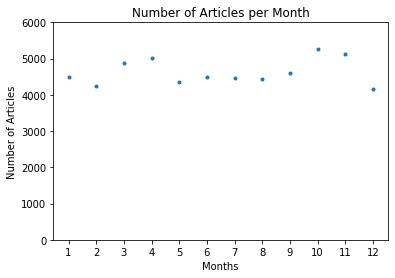

In [15]:
plt.plot(range(len(monthly_number)), list(monthly_number.values()), '.')
plt.ylim(0,6000)
plt.ylabel("Number of Articles")
plt.xlabel("Months")
plt.xticks(range(len(monthly_number)), list(monthly_number.keys()))
plt.title("Number of Articles per Month")
plt.show()

As can be easily seen in the plot, the number of articles remains more or less constant throughout the year. It is interesting to see that there is an increase in the number of articles in the months of March / April and October / November. For this reason, the following query looks at the WordClouds of these months in particular.

### Analyse Abstract (WORDCLOUD)

As a second analysis, the abstracts per month are analysed. For this purpose, the abstract for each article in the month is loaded into the Python package [nltk](https://www.nltk.org/) and a Wordcloud is created. The principle of a Wordcloud is to analyse a typed text and represent the frequently mentioned words in different sizes. The size of the respective word then indicates how much the word occurs in the text. A possible definition of this graphic can be read in this [link](https://www.infoclio.ch/de/node/130207).

This analysis is also made for each month individually. As described earlier, special attention is paid to the months of March / April and October / November.

In [16]:
for i in range(1,len(list_df)+1):
    
    import nltk
    nltk.download('stopwords')
    from nltk.corpus import stopwords
    from wordcloud import WordCloud
    
    # Create stopword list:
    stopwords = set(stopwords.words('english'))
    stopwords.update(["br", "href"])
    textt = " ".join(review for review in list_df[i-1].abstract) ## access the wanted column in the dataframe
    wordcloud = WordCloud(stopwords=stopwords).generate(textt)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig('./images/wordcloud_{}.jpg'.format(i))
    plt.close()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saend\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saend\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saend\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saend\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saend\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saend\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopword

After the images have been saved in the **images** folder, the four (March, April, October and November) Wordclouds in focus are examined below:

**March**:

![Wordcloud March](./images/wordcloud_3.png)

**April**:

![Wordcloud April](./images/wordcloud_4.png)

**October**:

![Wordcloud October](./images/wordcloud_10.png)

**November**:

![Wordcloud November](./images/wordcloud_11.png)

As it can be easily seen, there were two events in each month that dominated the reporting. In March and April it was the outbreak of the worldwide COVID-19 pandemic and in October and November it was the American presidential election, which was very well covered and frequent in the news.

### Article length of section 'Health' per Month

Following the evaluation of the abstracts of the respective articles, we will now take a closer look at the articles from the 'Health' section. First, we will take a closer look at the length of these articles. For this purpose, the articles from the relevant section are examined for each month and then the monthly average length of the articles is considered in each case:

In [19]:

count=0
list_section_length = []

for i in range(1,13):
    count+=1
    if count <=9:
        project = {
            "$project": {
                "_id": 0,
                "section_name": 1,
                "word_count": 1
            }
        }
        
        match = {
            "$match": {
                "pub_date": {"$gt": "2020-0{}-01T00:00:00+0000".format(i), "$lt": "2020-0{}-31T23:59:59+0000".format(i)},
                "section_name": "Health"
            }
        }

        group = {
            "$group": {
                "_id": "$section_name",
                "average_words": {"$avg": "$word_count"}
            }
        }
        
        sort = {
            "$sort": {
                "average_words": -1
            }
        }
        
    else:
        project = {
            "$project": {
                "_id": 0,
                "section_name": 1,
                "word_count": 1
            }
        }
        
        match = {
            "$match": {
                "pub_date": {"$gt": "2020-{}-01T00:00:00+0000".format(i), "$lt": "2020-{}-31T23:59:59+0000".format(i)},
                "section_name": "Health"
            }
        }

        group = {
            "$group": {
                "_id": "$section_name",
                "average_words": {"$avg": "$word_count"}
            }
        }
        
        sort = {
            "$sort": {
                "average_words": -1
            }
        }

    pipeline = [match, project, group, sort]

    c = archive.aggregate(pipeline)

    df_average_words = pd.DataFrame(c)
    
    list_section_length.append(int(df_average_words['average_words']))


print("Example for the month of December")
df_average_words

Example for the month of December


,_id,average_words
0,Health,1155.93


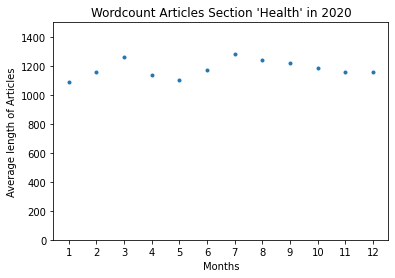

In [20]:
plt.plot(range(len(list_section_length)), list_section_length, '.')
#y = range(1,13)
#x = list_section_length
#m, b = np.polyfit(x, y, 1)
#plt.plot(list_section_length, m*x + b)
plt.ylim(0,1500)
plt.ylabel("Average length of Articles")
plt.xlabel("Months")
plt.xticks(range(len(list_section_length)), list(range(1,13)))
plt.title("Wordcount Articles Section 'Health' in 2020")
plt.show()

The plot highlights the fact, that the length of the articles trough out the year remained very constant. Only in the month of March did the average length increase to about 1300 words per article. This suggests that the articles in this category were effectively somewhat longer during the outbreak of the pandemic, but that the impact of this shock did not last very long.

### Printpage of Section 'Health'

Having established that the length of articles in the 'Health' section has not changed significantly as a result of the pandemic, we will now look at whether the importance of the section within the newspaper has increased. For this purpose, the 'print page' of the articles from the 'Health' section will be examined. If the print page approaches the front page, it can be assumed that the importance of the topic of health within the newspaper has increased.

In [22]:
count=0
list_print_page = []

for i in range(1,13):
    count+=1
    if count <=9:

        project = {
            "$project": {
                "section_name": 1,
                "print_page": 1,
                "pub_date": 1
            }
        }

        match = {
            "$match": {
                "section_name": "Health",
                "pub_date": {"$gt": "2020-0{}-01T00:00:00+0000".format(i), "$lt": "2020-0{}-31T23:59:59+0000".format(i)}
            }
        }

        group = {
            "$group": {
                "_id": "$section_name",
                "average_print_page": {"$avg": { "$convert": { "input": "$print_page", "to": "int" } }}
            }
        }

    else:
        project = {
            "$project": {
                "section_name": 1,
                "print_page": 1,
                "pub_date": 1
            }
        }

        match = {
            "$match": {
                "section_name": "Health",
                "pub_date": {"$gt": "2020-{}-01T00:00:00+0000".format(i), "$lt": "2020-{}-31T23:59:59+0000".format(i)}
            }
        }

        group = {
            "$group": {
                "_id": "$section_name",
                "average_print_page": {"$avg": { "$convert": { "input": "$print_page", "to": "int" } }}
            }
        }
    
    pipeline = [match, project, group]

    c = archive.aggregate(pipeline)
        
    df_print_page = pd.DataFrame(c)

    list_print_page.append(int(df_print_page['average_print_page']))



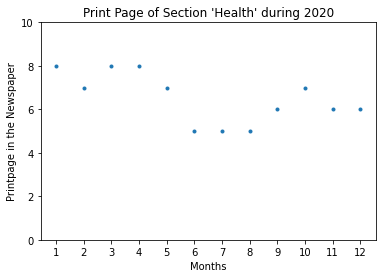

In [23]:
plt.plot(range(len(list_print_page)), list_print_page, '.')
plt.ylim(0,10)
plt.ylabel("Printpage in the Newspaper")
plt.xlabel("Months")
plt.xticks(range(len(list_print_page)), list(range(1,13)))
plt.title("Print Page of Section 'Health' during 2020")
plt.show()

Within this plot, a clear tendency towards page one can be discerned. Thus, it can be said that the importance of the 'Health' section has increased in 2020, the year of the pandemic.

## Conclusion

In the following chapter, the questions posed at the beginning will be answered on the basis of the analysis made. For the sake of readability, the questions are listed again below and answered one after the other:

* Did the pandemic have an impact on the number of articles written in the New York Times?

Based on the analyses carried out, it can be said that only the outbreak of the pandemic led to an increased number of articles. However, the increase in articles written was short-lived and there was no lasting impact from the pandemic.

* Who are the New York Times top writers? and into which sections are they active?

In retrospect, the question about the top writers was probably formulated a little too openly and could only be assessed in terms of quantity due to the data available. From this point of view, the top five authors could be clearly identified. At first glance, however, it was somewhat surprising to find that none of these authors had written an article in the focused section 'Health'. On closer inspection, this is probably due to the fact that the quantitatively strong authors are in sections such as 'Crosswords & Games', 'Food' and 'At Home'. These are probably sections that have their fixed places in every issue of the New York Times. Thus, this question cannot be answered precisely on the basis of this data and would probably have to be specified or modified afterwards.

* To what extent did the COVID-19 pandemic dominate the news coverage?

Looking through the wordclouds created, it was somewhat surprising to find that the news was dominated more by President Trump than by the Corona pandemic. Here, too, it can be said that the months of March / April were dominated by the pandemic and that this was somewhat relativised later.

* How have the articles in the 'Health' section changed as a result of the COVID-19 pandemic?

The last question can be answered as follows based on the data analysis. Although there is a pandemic, the length of the articles in the 'Health' section has not changed in the long term. However, based on the analysed placement (print_page), which shows a clear tendency towards the front pages, it can be concluded that the importance of the 'Health' section within the New York Times has increased.

## Remarks

Finally, a conclusion should be drawn for the module "Big Data Lab I". The combination of the 'Data Camp Course' and your own project provides a good insight into the technology of MongoDB. The examples provided in abundance make it possible to get to know and see many possible applications.

For me personally, the greatest difficulty was finding a suitable data set and building a suitable use case for it. 

In [24]:
%%HTML
<style>
/* display:none  -> hide In/Out column */
/* display:block -> show In/Out column */
div.prompt {display:none}

/* removes inserted URL after links when printing */
@media print {
    a[href]:after { content: none; }         
}
</style>